# Customer Churn and Attrition Prediction Model

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [67]:
#loading the churn_data from the saved workbook
data = pd.read_excel(r"C:\Users\Lakshmi Priya S\OneDrive\Desktop\Churn Analysis and Prediction Project\churn_data.xlsx","vw_ChurnData")
data.head(5)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12728-AND,Female,28,Yes,Andhra Pradesh,2,13,NaN,Yes,Yes,...,Credit Card,80.300003,324.200012,0.0,0,154.960007,479.160004,Stayed,Others,Others
1,12736-ASS,Female,62,No,Assam,10,3,NaN,Yes,No,...,Bank Withdrawal,69.349998,69.349998,0.0,0,22.030001,91.379997,Churned,Attitude,Attitude of service provider
2,12739-HAR,Male,57,Yes,Haryana,1,31,NaN,Yes,Yes,...,Credit Card,88.650002,5321.250000,0.0,0,1194.380005,6515.629883,Stayed,Others,Others
3,12746-WES,Male,53,No,West Bengal,7,17,NaN,Yes,No,...,Credit Card,19.950001,59.250000,0.0,0,139.440002,198.690002,Stayed,Others,Others
4,12752-RAJ,Female,30,No,Rajasthan,4,17,NaN,Yes,No,...,Credit Card,20.500000,1424.900024,0.0,0,3291.879883,4716.779785,Stayed,Others,Others


In [68]:
data.shape

(6007, 32)

In [69]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [71]:
def column_summary(data):
    summary_data = []
    for col in data.columns:
        column_dtype = data[col].dtype
        no_of_null = data[col].isnull().sum()
        no_of_notnull = data[col].notnull().sum()
        distinct_values = data[col].nunique()
        summary_data.append({
        'Features' : col,
        'Data_Type': column_dtype,
        'No_of_Null' : no_of_null,
        'No_of_non_null' : no_of_notnull,
        'No_of_Distinct_values' : distinct_values
        })
    summary_df= pd.DataFrame(summary_data)
    return summary_df

pd.set_option('display.max_rows', None)
summary_df = column_summary(data)
display(summary_df)

,Features,Data_Type,No_of_Null,No_of_non_null,No_of_Distinct_values
0,Customer_ID,object,0,6007,6007
1,Gender,object,0,6007,2
2,Age,int64,0,6007,67
3,Married,object,0,6007,2
4,State,object,0,6007,22
5,Number_of_Referrals,int64,0,6007,16
6,Tenure_in_Months,int64,0,6007,36
7,Value_Deal,object,3297,2710,5
8,Phone_Service,object,0,6007,2
9,Multiple_Lines,object,0,6007,2


In [72]:
data.duplicated().sum()

0

The data has no cuplicates. Value_deals and Internet_type has huge number of missing values so handling them.

In [73]:
#Filling nulls values with "None" Indicating no value_deals applied or no internet_type mensioned.
data[['Value_Deal', 'Internet_Type']] = data[['Value_Deal', 'Internet_Type']].fillna('None')

In [74]:
#Dropping Unnecessary Features from the data
data.drop(columns=['Customer_ID','Churn_Category','Churn_Reason'], inplace = True) 

In [75]:
num_cols = data.select_dtypes(include=['int','float']).columns
cat_cols =  data.select_dtypes('object').columns
print(f'Numerical Variables:',num_cols)
print(f'\nCategorical Variables:',cat_cols)

Numerical Variables: Index(['Age', 'Number_of_Referrals', 'Tenure_in_Months', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue'],
      dtype='object')

Categorical Variables: Index(['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Customer_Status'],
      dtype='object')


In [76]:
#Viewing the distinct values present in cat columns to efficiently encode data.
for col in cat_cols:
    unique_values = data[col].unique()
    count = len(unique_values)
    print(f'{col}:{count}\n unique values - {unique_values}\n')   

Gender:2
 unique values - ['Female' 'Male']

Married:2
 unique values - ['Yes' 'No']

State:22
 unique values - ['Andhra Pradesh' 'Assam' 'Haryana' 'West Bengal' 'Rajasthan' 'Tamil Nadu'
 'Maharashtra' 'Jharkhand' 'Kerala' 'Punjab' 'Jammu & Kashmir' 'Bihar'
 'Madhya Pradesh' 'Karnataka' 'Gujarat' 'Uttar Pradesh' 'Delhi'
 'Telangana' 'Odisha' 'Uttarakhand' 'Chhattisgarh' 'Puducherry']

Value_Deal:6
 unique values - ['None' 'Deal 1' 'Deal 5' 'Deal 2' 'Deal 4' 'Deal 3']

Phone_Service:2
 unique values - ['Yes' 'No']

Multiple_Lines:2
 unique values - ['Yes' 'No']

Internet_Service:2
 unique values - ['Yes' 'No']

Internet_Type:4
 unique values - ['Fiber Optic' 'DSL' 'None' 'Cable']

Online_Security:2
 unique values - ['No' 'Yes']

Online_Backup:2
 unique values - ['Yes' 'No']

Device_Protection_Plan:2
 unique values - ['No' 'Yes']

Premium_Support:2
 unique values - ['No' 'Yes']

Streaming_TV:2
 unique values - ['No' 'Yes']

Streaming_Movies:2
 unique values - ['No' 'Yes']

Streaming_Musi

In [77]:
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844


> There is "-10" value as the min Monthly charge, 0 is also possible but negative monthly charges feels tricky lets analyse.

In [78]:
#checking the number of negative values 
num_negative = (data['Monthly_Charge'] < 0).sum()
print(f"Number of negative monthly charges: {num_negative}")

Number of negative monthly charges: 101


In [79]:
# If total refund if greater than the total charges then monthly charge can be negative 
data[data['Total_Refunds'] > data['Total_Charges']]

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status


> No data has 'Total_Refunds' > 'Total_Charges', so that is not the reason for the negative entry

In [80]:
data[data['Total_Charges'] == 0]

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status


> No data has "Total_Charges" zero, this is also no the reason

In [81]:
#Checking if any deals are the reason for negative monthly charges, since extensive discounts can couse negative monlthly charges
data[data['Monthly_Charge'] < 0][['Value_Deal', 'Monthly_Charge']]

,Value_Deal,Monthly_Charge
22,None,-4.0
50,None,-8.0
52,None,-7.0
95,None,-4.0
203,Deal 5,-4.0
400,Deal 3,-8.0
420,None,-1.0
427,None,-10.0
433,None,-5.0
453,None,-10.0


> Since, Deals apply for certain data causing negative Monthly_Charges, Then may be extensive discounts or promotional rates. 'None' are actual 'nulls' so they might be someother deals. So lets leave this undisturbed. 

In [82]:
import klib
num_data = data.select_dtypes(include=['int','float'])
klib.corr_mat(num_data)

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
Age,1.00,-0.02,0.15,0.13,0.05,0.01,0.03,-0.01,0.04
Number_of_Referrals,-0.02,1.00,-0.01,-0.01,-0.00,0.02,-0.00,0.01,0.00
Tenure_in_Months,0.15,-0.01,1.00,-0.01,-0.01,0.01,0.02,0.00,-0.00
Monthly_Charge,0.13,-0.01,-0.01,1.00,0.62,0.01,0.12,0.21,0.55
Total_Charges,0.05,-0.00,-0.01,0.62,1.00,0.02,0.12,0.59,0.97
Total_Refunds,0.01,0.02,0.01,0.01,0.02,1.00,0.02,0.02,0.02
Total_Extra_Data_Charges,0.03,-0.00,0.02,0.12,0.12,0.02,1.00,0.05,0.12
Total_Long_Distance_Charges,-0.01,0.01,0.00,0.21,0.59,0.02,0.05,1.00,0.76
Total_Revenue,0.04,0.00,-0.00,0.55,0.97,0.02,0.12,0.76,1.00


In [83]:
encode_cols = [col for col in cat_cols if col != 'Customer_Status']
label_encoders = {}
for col in encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

> Encoding categorical columns for prediction is crusial for ML algorithms to perform on data, there are a slot of distinct values in certain column which will scale the size of the data after encoding to avoid this consequence label encoding is used.

In [84]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed':0,'Churned':1})

<Axes: xlabel='Customer_Status', ylabel='count'>

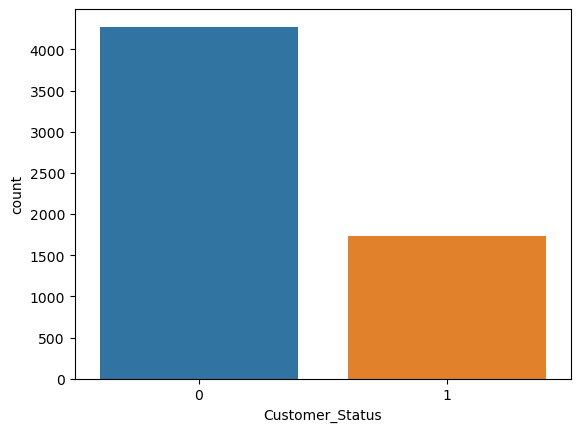

In [85]:
sns.countplot(x='Customer_Status',data=data)

> Data Seems to be imbalanced data, since "churned" is less than half of "stayed" data.

In [86]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,28,1,0,2,13,5,1,1,1,...,0,1,1,80.300003,324.200012,0.0,0,154.960007,479.160004,0
1,0,62,0,1,10,3,5,1,0,1,...,0,1,0,69.349998,69.349998,0.0,0,22.030001,91.379997,1
2,1,57,1,6,1,31,5,1,1,1,...,2,0,1,88.650002,5321.250000,0.0,0,1194.380005,6515.629883,0
3,1,53,0,21,7,17,5,1,0,0,...,0,1,1,19.950001,59.250000,0.0,0,139.440002,198.690002,0
4,0,30,0,16,4,17,5,1,0,0,...,2,0,1,20.500000,1424.900024,0.0,0,3291.879883,4716.779785,0


In [87]:
y = data['Customer_Status']
X = data.drop(['Customer_Status'], axis =1)
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [88]:
#Model Building
from imblearn.over_sampling import SMOTE

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model_rfc', RandomForestClassifier(n_estimators=100, class_weight='balanced',oob_score=True, random_state=42))
])

In [89]:
#Hyperparameter_tuning | The parameters in the param_grid are the parameter of the modle_rf estimator in the pipleline
param_grid1 = {
    'model_rfc__criterion': ['gini', 'entropy', 'log_loss'],
    'model_rfc__max_depth': [10, 15, 20, 30],
    'model_rfc__min_samples_split': [2, 5, 10],
    'model_rfc__min_samples_leaf': [1, 2, 3, 4, 5],
    'model_rfc__max_features': ['sqrt', 'log2'],
}
random_search = RandomizedSearchCV(estimator= pipeline_rf, param_distributions=param_grid1, cv =5, scoring= 'f1')#'f1 score is used cause we are dealing with imbalanced data and binary targets.
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model_rfc',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     oob_score=True,
                                                                     random_state=42))]),
                   param_distributions={'model_rfc__criterion': ['gini',
                                                                 'entropy',
                                                                 'log_loss'],
                                        'model_rfc__max_depth': [10, 15, 20,
                                                                 30],
                                        'model_rfc__max_features': ['sqrt',
                                                                    'log2'],
                                        'model_rfc__min_samples_leaf': [1, 2, 3,
                                                                        4, 5],
                                        'model_rfc__min_samples_split': [2, 5,
                                                                         10]},
                   scoring='f1')

In [90]:
best_param = random_search.best_params_ 
best_score = random_search.best_score_
print("Best Parameters:", best_param)
print("Best Score:", best_score)

Best Parameters: {'model_rfc__min_samples_split': 10, 'model_rfc__min_samples_leaf': 4, 'model_rfc__max_features': 'sqrt', 'model_rfc__max_depth': 10, 'model_rfc__criterion': 'entropy'}
Best Score: 0.7306518741972987


In [91]:
best_pipeline1 = random_search.best_estimator_
y_pred_train = best_pipeline1.predict(X_train)
y_pred_test = best_pipeline1.predict(X_test)

In [92]:
#ConfusionMatrix and ClassificationReport of Train Data
print(f'Confusion Matrix:\n{confusion_matrix(y_train, y_pred_train)}\n')
print(f'Classification Report:\n{classification_report(y_train, y_pred_train)}')

Confusion Matrix:
[[3065  354]
 [ 198 1188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3419
           1       0.77      0.86      0.81      1386

    accuracy                           0.89      4805
   macro avg       0.85      0.88      0.86      4805
weighted avg       0.89      0.89      0.89      4805



In [93]:
#ConfusionMatrix and ClassificationReport of Test Data
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_test)}\n')
print(f'Classification Report:\n{classification_report(y_test, y_pred_test)}')

Confusion Matrix:
[[753 103]
 [ 73 273]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       856
           1       0.73      0.79      0.76       346

    accuracy                           0.85      1202
   macro avg       0.82      0.83      0.83      1202
weighted avg       0.86      0.85      0.86      1202



Test Data Analysis:

Confusion Matrix:

- True Negatives (TN): 3065 (Correctly predicted class 0)
- False Positives (FP): 198 (Incorrectly predicted class 1 when it was actually 0)
- False Negatives (FN): 354 (Incorrectly predicted class 0 when it was actually 1)
- True Positives (TP): 1188 (Correctly predicted class 1)

Classification Report:
- High accuracy (0.89).
- High precision for both classes (0.94 for 0, 0.77 for 1).
- High recall for class 0 (0.90), good recall for class 1 (0.86).
- High F1-scores for both classes (0.92 for 0, 0.81 for 1).
> Model learned the training data very well.

-------------------------------------------------------------------------------------------------
Test Data Analysis:

Confusion Matrix:

- True Negatives (TN): 753 (Correctly predicted class 0)
- False Positives (FP): 73 (Incorrectly predicted class 1 when it was actually 0)
- False Negatives (FN): 103 (Incorrectly predicted class 0 when it was actually 1)
- True Positives (TP): 273 (Correctly predicted class 1)

Classification Report:

- Good accuracy (0.86), slightly lower than training.
- Reasonable precision for both classes (0.91 for 0, 0.73 for 1).
- Reasonable recall for both class 0 (0.88) and class 1 (0.79).
- F1-score for class 0 (0.90) is good, but lower for class 1 (0.76).
> Performance is slightly lower on unseen data, especially for correctly identifying class 1.

---------------------------------------------------------------------------------------------------
Final Conclusion:

> The model performs well overall, achieving a good accuracy on the unseen test data. However, there is a noticeable drop in performance compared to the training data, suggesting a slight degree of overfitting. The model is particularly better at identifying instances of class 0 compared to class 1, as indicated by the lower recall and F1-score for class 1 on the test set. This may be because the data is imbalanced {Customer_Status : Stayed > 2(churned)} This the class 0 is influencing the model performance since it is the majority class. To resolved use Oversampling technique like SMOTE to enhance performance of model in classifying class 0 better.

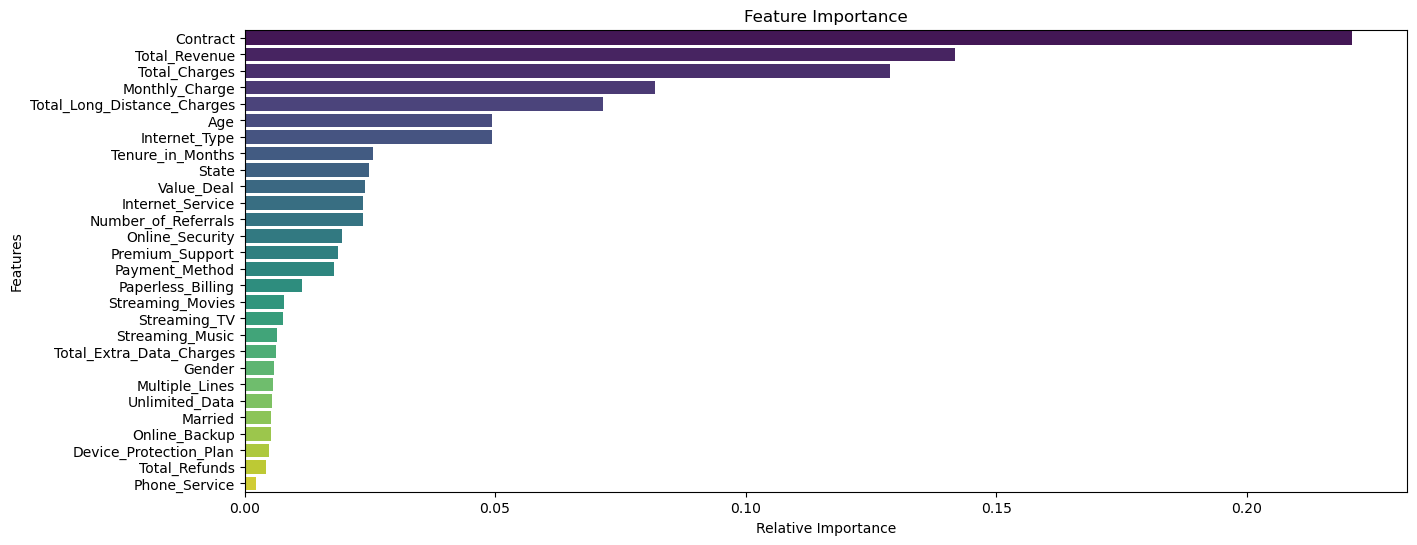

In [94]:
#Feature Selection using Feature Importance 
importances = best_pipeline1.named_steps['model_rfc'].feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Plot the feature importance
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

> Feature importance technique is used to identify which features (or variables) in the dataset that contribute the most to the prediction made by a machine learning model. Sometime the model might is overfitting the training data in such cases feature importance are used to eliminate low importance features to increase accuracy.

# Prediction on Unseen/New data

In [106]:
import os 

new_data = pd.read_excel(r"C:\Users\Lakshmi Priya S\OneDrive\Desktop\Churn Analysis and Prediction Project\churn_data.xlsx","vw_JoinData")
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
label_encoders = {}
for col in new_data.select_dtypes(include=['object']).columns:
    if col not in label_encoders:
        label_encoders[col] = LabelEncoder()
        new_data[col] = label_encoders[col].fit_transform(new_data[col])
    else:
        new_data[col] = label_encoders[col].transform(new_data[col])
        
# Make predictions
new_predictions = best_pipeline1.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
# Create the folder if it doesn't exist
os.makedirs( r"C:\Users\Lakshmi Priya S\OneDrive\Desktop\Churn Analysis and Prediction Project", exist_ok=True)
# Save the DataFrame to a .csv file within that folder
output_path = os.path.join( r"C:\Users\Lakshmi Priya S\OneDrive\Desktop\Churn Analysis and Prediction Project", "Prediction_data_output.csv")
original_data.to_csv(output_path, index=False)

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   16032-AND  Female   47      No  Andhra Pradesh                    8   
1   16068-BIH  Female   44     Yes           Bihar                    4   
2   16244-UTT  Female   19     Yes   Uttar Pradesh                    5   
3   19041-AND  Female   36      No  Andhra Pradesh                    6   
4   21956-JHA  Female   59     Yes       Jharkhand                   10   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                18        NaN           Yes             No  ...   
1                25     Deal 5            No             No  ...   
2                 7        NaN           Yes             No  ...   
3                21     Deal 5            No             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      46.599998     87.900002           0.0   
1  Bank Wi

> Predicted Results are saved in as csv and the file is attached for your reference! THANK YOU...